the fit time for SVC, scales at least quadratically with the number of samples and may be impractical beyond tens of thousands of samples. therefore for large datasets consider using LinearSVC or SGDClassifier instead. 

## import libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

## load datasets

In [2]:
# load random undersampling data
X_rus_train = pd.read_csv('data/rus/X_rus_train.csv')
X_rus_test = pd.read_csv('data/rus/X_rus_test.csv')

y_rus_train = pd.read_csv('data/rus/y_rus_train.csv')
y_rus_test = pd.read_csv('data/rus/y_rus_test.csv')

# load random oversampling data
X_ros_train = pd.read_csv('data/ros/X_ros_train.csv')
X_ros_test = pd.read_csv('data/ros/X_ros_test.csv')

y_ros_train = pd.read_csv('data/ros/y_ros_train.csv')
y_ros_test = pd.read_csv('data/ros/y_ros_test.csv')

# load preprocessed original data
X_org_train = pd.read_csv('data/org/X_org_train.csv')
X_org_test = pd.read_csv('data/org/X_org_test.csv')

y_org_train = pd.read_csv('data/org/y_org_train.csv')
y_org_test = pd.read_csv('data/org/y_org_test.csv')

## support vector classifier (SVC)

due to the huge number of samples, the training for SVC takes forever. therefore LinearSVC is trained and evaluated . 

## LinearSVC

Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.

In [14]:
C = [1e-3, 1e-2, 1e-1, 1, 2, 5, 15, 30]
LOSS = ['hinge', 'squared_hinge'] 
PENALTY = 'l2'
CLASS_WEIGHT = 'balanced'

### LinearSVC on random undersampling

In [15]:
# dictionary to save each model hyperparameters along with accuracy
dic_model_linear_svc_rus = dict() 

# keep track of the highest accuracy
best_acc = 0 
# keep track of the model with highest accuracy
best_model = 1 
# the key for dictionary
model_number = 1

for c in C:
    for loss in LOSS: 
        model_linear_svc = LinearSVC(C=c, loss=loss, penalty=PENALTY,  
                                class_weight=CLASS_WEIGHT, random_state=7)
        
        model_linear_svc.fit(X_rus_train, y_rus_train)
        y_pred = model_linear_svc.predict(X_rus_test)
        accuracy = accuracy_score(y_true=y_rus_test, y_pred=y_pred)

        dic_model_linear_svc_rus[model_number] = [accuracy, c, loss, PENALTY]

        if accuracy > best_acc:
                best_acc = accuracy
                best_model = model_number
                
        model_number += 1

In [16]:
print(f'linear svc with random undersampling {best_acc = }')
print(f'linear svc with random undersampling {best_model = }')
print('linear svc with random undersampling best model hyperparameters',  
      dic_model_linear_svc_rus[best_model])

linear svc with random undersampling best_acc = 0.7426939592279151
linear svc with random undersampling best_model = 6
linear svc with random undersampling best model hyperparameters [0.7426939592279151, 0.1, 'squared_hinge', 'l2']


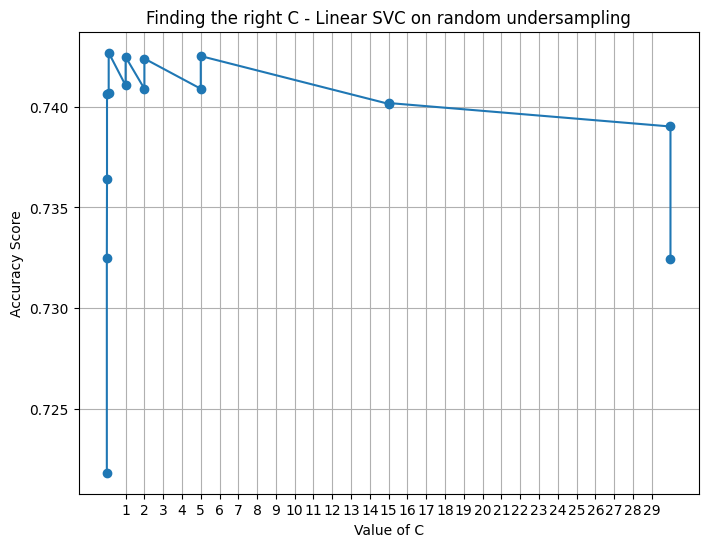

In [18]:
# plot each model's accuracy
ACC = []
C = []

for model in dic_model_linear_svc_rus.keys():
    ACC.append(dic_model_linear_svc_rus[model][0])
    C.append(dic_model_linear_svc_rus[model][1])

plt.figure(figsize=(8, 6))
plt.plot(C, ACC, marker = "o")
plt.xlabel("Value of C")
plt.ylabel("Accuracy Score")
plt.title("Finding the right C - Linear SVC on random undersampling")
plt.xticks(range(1, 30))
plt.grid()

### LinearSVC on random oversampling

In [19]:
# dictionary to save each model hyperparameters along with accuracy
dic_model_linear_svc_ros = dict() 

# keep track of the highest accuracy
best_acc = 0 
# keep track of the model with highest accuracy
best_model = 1 
# the key for dictionary
model_number = 1

for c in C:
    for loss in LOSS: 
        model_linear_svc = LinearSVC(C=c, loss=loss, penalty=PENALTY,  
                                class_weight=CLASS_WEIGHT, random_state=7)
        
        model_linear_svc.fit(X_ros_train, y_ros_train)
        y_pred = model_linear_svc.predict(X_ros_test)
        accuracy = accuracy_score(y_true=y_ros_test, y_pred=y_pred)

        dic_model_linear_svc_ros[model_number] = [accuracy, c, loss, PENALTY]

        if accuracy > best_acc:
                best_acc = accuracy
                best_model = model_number
                
        model_number += 1

In [20]:
print(f'linear svc with random oversampling {best_acc = }')
print(f'linear svc with random oversampling {best_model = }')
print('linear svc with random oversampling best model hyperparameters',  
      dic_model_linear_svc_ros[best_model])

linear svc with random oversampling best_acc = 0.7444276333234546
linear svc with random oversampling best_model = 13
linear svc with random oversampling best model hyperparameters [0.7444276333234546, 1, 'hinge', 'l2']


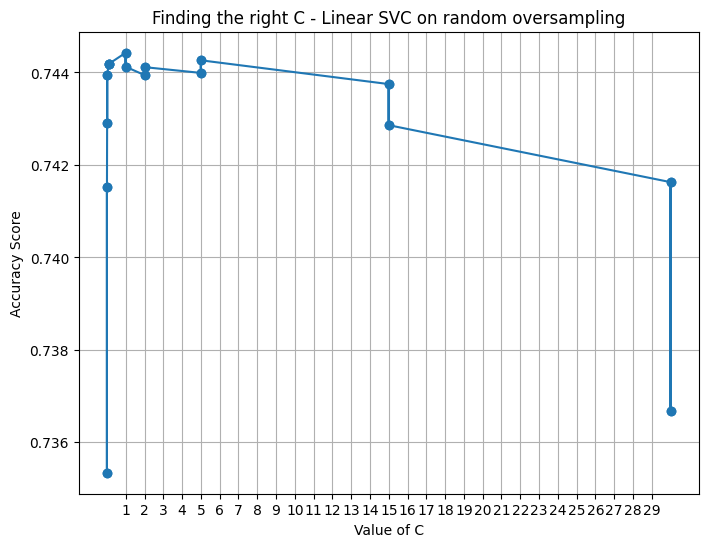

In [22]:
# plot each model's accuracy
ACC = []
C = []

for model in dic_model_linear_svc_ros.keys():
    ACC.append(dic_model_linear_svc_ros[model][0])
    C.append(dic_model_linear_svc_ros[model][1])

plt.figure(figsize=(8, 6))
plt.plot(C, ACC, marker = "o")
plt.xlabel("Value of C")
plt.ylabel("Accuracy Score")
plt.title("Finding the right C - Linear SVC on random oversampling")
plt.xticks(range(1, 30))
plt.grid()

## save models performance report

In [23]:
df_rus_model = pd.DataFrame(dic_model_linear_svc_rus)
df_ros_model = pd.DataFrame(dic_model_linear_svc_ros)

df_rus_model.to_csv('findings/svm/df_rus_model.csv', index=False)
df_ros_model.to_csv('findings/svm/df_ros_model.csv', index=False)